In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import elasticdeform
from sklearn.model_selection import train_test_split

c:\Users\Everyday\anaconda3\envs\scipy\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Everyday\anaconda3\envs\scipy\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Everyday\anaconda3\envs\scipy\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [33]:
from tensorflow.keras.datasets import mnist
import numpy as np
tf.random.set_seed(1234)

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()


x_train_full = x_train_full.reshape(x_train_full.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train_augmented, x_val, y_train_augmented, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [58]:

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5000,
    decay_rate=0.96,
    staircase=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                            patience=5, min_lr=0.00001)


model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=10, activation = 'softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
            optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy'])




history = model.fit(datagen.flow(x_train_augmented,y_train_augmented),  epochs=200, batch_size=256, validation_data=(x_val, y_val), callbacks=[reduce_lr])



Epoch 1/200
1500/1500 [==============================] - 16s 10ms/step - loss: 0.6257 - accuracy: 0.7982 - val_loss: 0.1714 - val_accuracy: 0.9498 - lr: 0.0010
Epoch 2/200
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3577 - accuracy: 0.8887 - val_loss: 0.1242 - val_accuracy: 0.9640 - lr: 0.0010
Epoch 3/200
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3022 - accuracy: 0.9069 - val_loss: 0.1234 - val_accuracy: 0.9622 - lr: 0.0010
Epoch 4/200
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2698 - accuracy: 0.9164 - val_loss: 0.0876 - val_accuracy: 0.9742 - lr: 9.6000e-04
Epoch 5/200
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2482 - accuracy: 0.9220 - val_loss: 0.0901 - val_accuracy: 0.9724 - lr: 9.6000e-04
Epoch 6/200
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2352 - accuracy: 0.9277 - val_loss: 0.0791 - val_accuracy: 0.9772 - lr: 9.6000e-04
Epoch 7/200
1500/1500 [=====

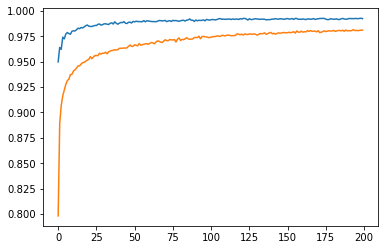

In [59]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

In [60]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0247 - accuracy: 0.9927
Test loss: 0.02472463808953762
Test accuracy: 0.9926999807357788


In [61]:
model.save_weights('./checkpoints/3Layer')

In [32]:
### testing for second benchmark does not improve performance

leNet = keras.Sequential()

leNet.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', padding='same',
                              input_shape=(28,28,1)))
leNet.add(keras.layers.AveragePooling2D())

leNet.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
leNet.add(keras.layers.AveragePooling2D())

leNet.add(keras.layers.Flatten())

leNet.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
leNet.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dropout(0.4))
leNet.add(keras.layers.Dense(units=84, activation='relu'))

leNet.add(keras.layers.Dense(units=10, activation = 'softmax'))

In [37]:
leNet.compile(loss=keras.losses.sparse_categorical_crossentropy,
            optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
le_history = leNet.fit(x_train_augmented, y_train_augmented, epochs=100, batch_size=32, validation_data=(x_val, y_val), callbacks=[reduce_lr])

Epoch 1/100
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0137 - accuracy: 0.9961 - val_loss: 0.0996 - val_accuracy: 0.9827 - lr: 1.0000e-04
Epoch 2/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0865 - val_accuracy: 0.9865 - lr: 1.0000e-04
Epoch 3/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.0729 - val_accuracy: 0.9856 - lr: 1.0000e-04
Epoch 4/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 0.0563 - val_accuracy: 0.9898 - lr: 1.0000e-04
Epoch 5/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0658 - val_accuracy: 0.9872 - lr: 1.0000e-04
Epoch 6/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.0784 - val_accuracy: 0.9854 - lr: 1.0000e-04
Epoch 7/100
1500/1500 

In [36]:
Le_score = leNet.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9890
Test loss: 0.08708471059799194
Test accuracy: 0.9797999858856201
